# 1. Importing libraries and loading the dataset

In [1]:
import warnings

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
dataframe = pd.read_csv("Datasets/steam_games_cleaned.csv")
dataframe.shape

(16344, 150)

In [3]:
dataframe.head()

,release_date,has_setting,published_by_developer,multiple_languages,FPS,Gore,Action,Shooter,First-Person,Great Soundtrack,...,genre_Free to Play,genre_RPG,genre_Indie,genre_Early Access,genre_Simulation,genre_Racing,genre_Casual,genre_Sports,total_reviews,positive_reviews_share
0,2016,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,42550.0,0.92
1,2017,False,True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,836608.0,0.49
2,2018,False,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,7030.0,0.71
3,2018,False,True,True,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,167115.0,0.61
4,2003,False,True,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,False,11481.0,0.74


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16344 entries, 0 to 16343
Columns: 150 entries, release_date to positive_reviews_share
dtypes: bool(147), float64(2), int64(1)
memory usage: 2.7 MB


**1 int, 2 float and 147 bool data types entries.**

# 2. Check for a missed data

<Axes: >

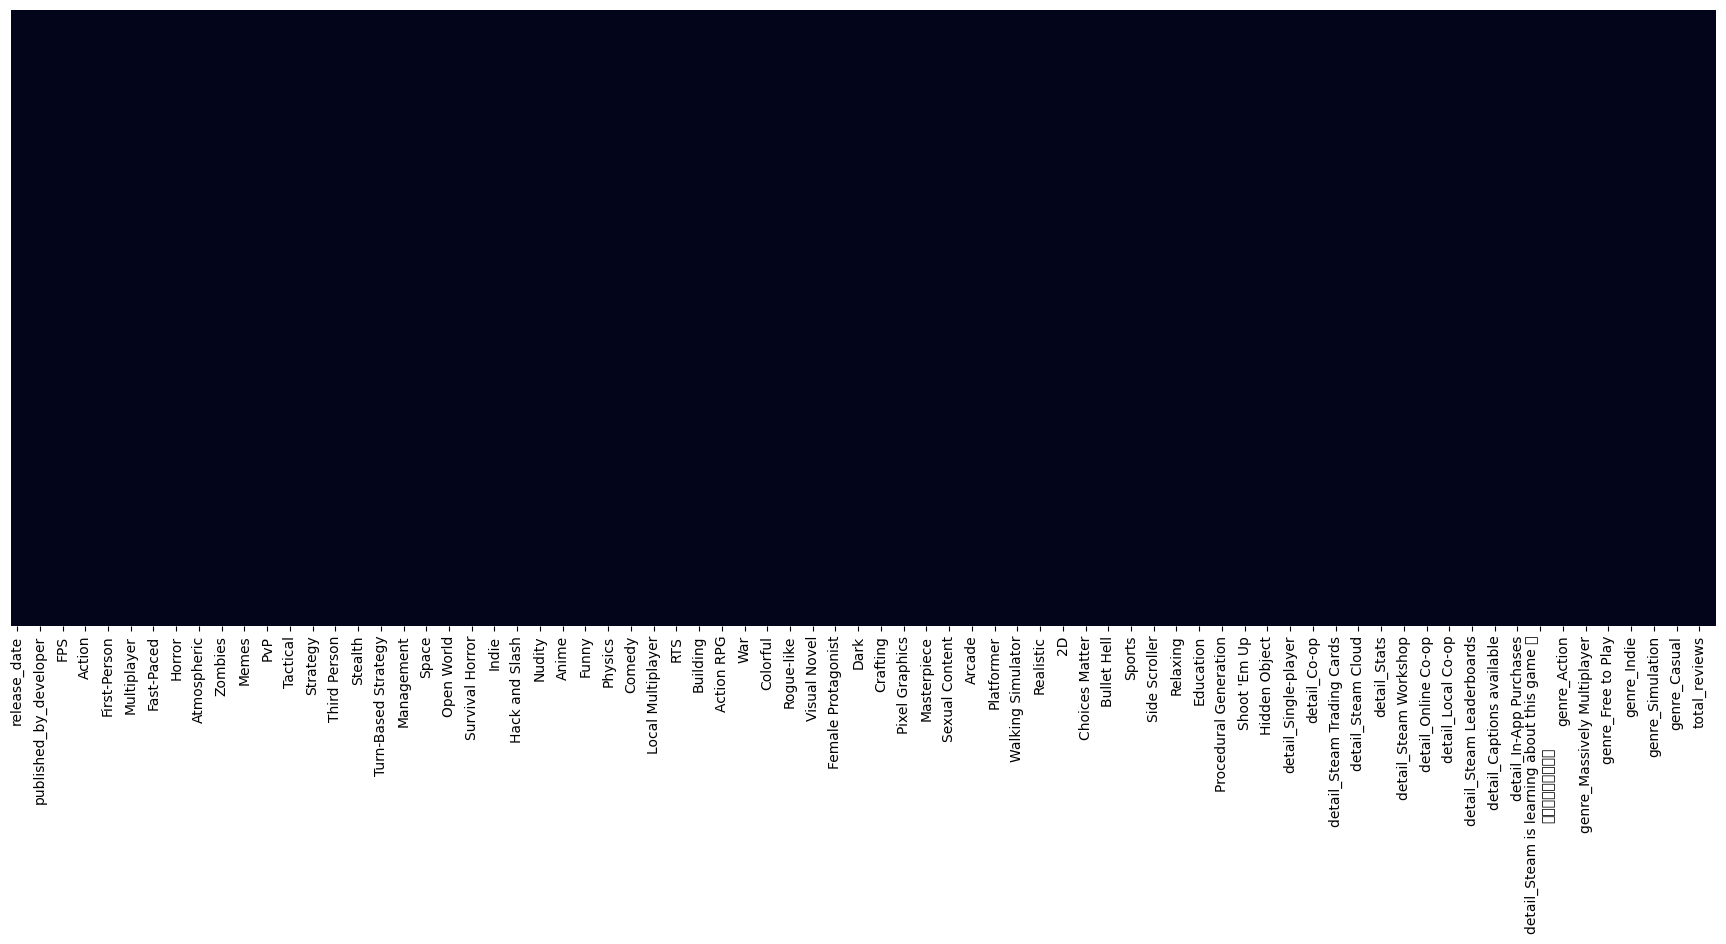

In [5]:
plt.figure(figsize=(22, 8))
sb.heatmap(dataframe.isnull(), yticklabels=False, cbar=False)

**No missing data.**

# 3. Seek for a correlation

**Too many columns to show in one go. Creating a variable to show the middle of the dataset.**

In [6]:
corr_results = dataframe.corr()["positive_reviews_share"].sort_values(ascending=False)
middle_rows = corr_results[len(corr_results)//2-15:len(corr_results)//2+15]

In [7]:
dataframe.corr()["positive_reviews_share"].sort_values(ascending=False).head(60)

positive_reviews_share            1.000000
Great Soundtrack                  0.179945
detail_Steam Cloud                0.172158
detail_Steam Achievements         0.147947
2D                                0.146521
Singleplayer                      0.130163
Cute                              0.126918
Story Rich                        0.125874
detail_Full controller support    0.123697
Puzzle                            0.120793
Pixel Graphics                    0.114025
Visual Novel                      0.110171
Retro                             0.106159
Anime                             0.097821
Classic                           0.096717
Difficult                         0.094683
Funny                             0.090476
detail_Steam Leaderboards         0.090407
Platformer                        0.088986
Comedy                            0.088651
Female Protagonist                0.086718
detail_Single-player              0.081262
Indie                             0.077324
Masterpiece

In [8]:
middle_rows

JRPG                                                               0.034158
Replay Value                                                       0.033759
Top-Down                                                           0.033396
detail_Steam is learning about this game \r\n\t\t\t\t\t\t\t\t\t    0.032709
detail_Stats                                                       0.031258
Nudity                                                             0.030705
Adventure                                                          0.030239
Mature                                                             0.030052
detail_Profile Features Limited \r\n\t\t\t\t\t\t\t\t\t             0.029639
RPGMaker                                                           0.028787
detail_Captions available                                          0.028747
Psychological Horror                                               0.027951
has_setting                                                        0.027721
detail_Local

In [9]:
dataframe.corr()["positive_reviews_share"].sort_values(ascending=False).tail(60)

Shooter                              0.012892
Tactical                             0.011480
Competitive                          0.010744
genre_Casual                         0.010342
Action RPG                           0.010279
genre_Adventure                      0.007807
detail_Partial Controller Support    0.006982
Stealth                              0.005400
Design & Illustration                0.004126
RPG                                  0.002601
detail_Co-op                         0.002555
Historical                          -0.000797
genre_RPG                           -0.003095
First-Person                        -0.003920
Turn-Based Strategy                 -0.004177
RTS                                 -0.004574
Space                               -0.004935
Action                              -0.008717
Gore                                -0.008741
Tower Defense                       -0.009013
Horror                              -0.009426
Card Game                         

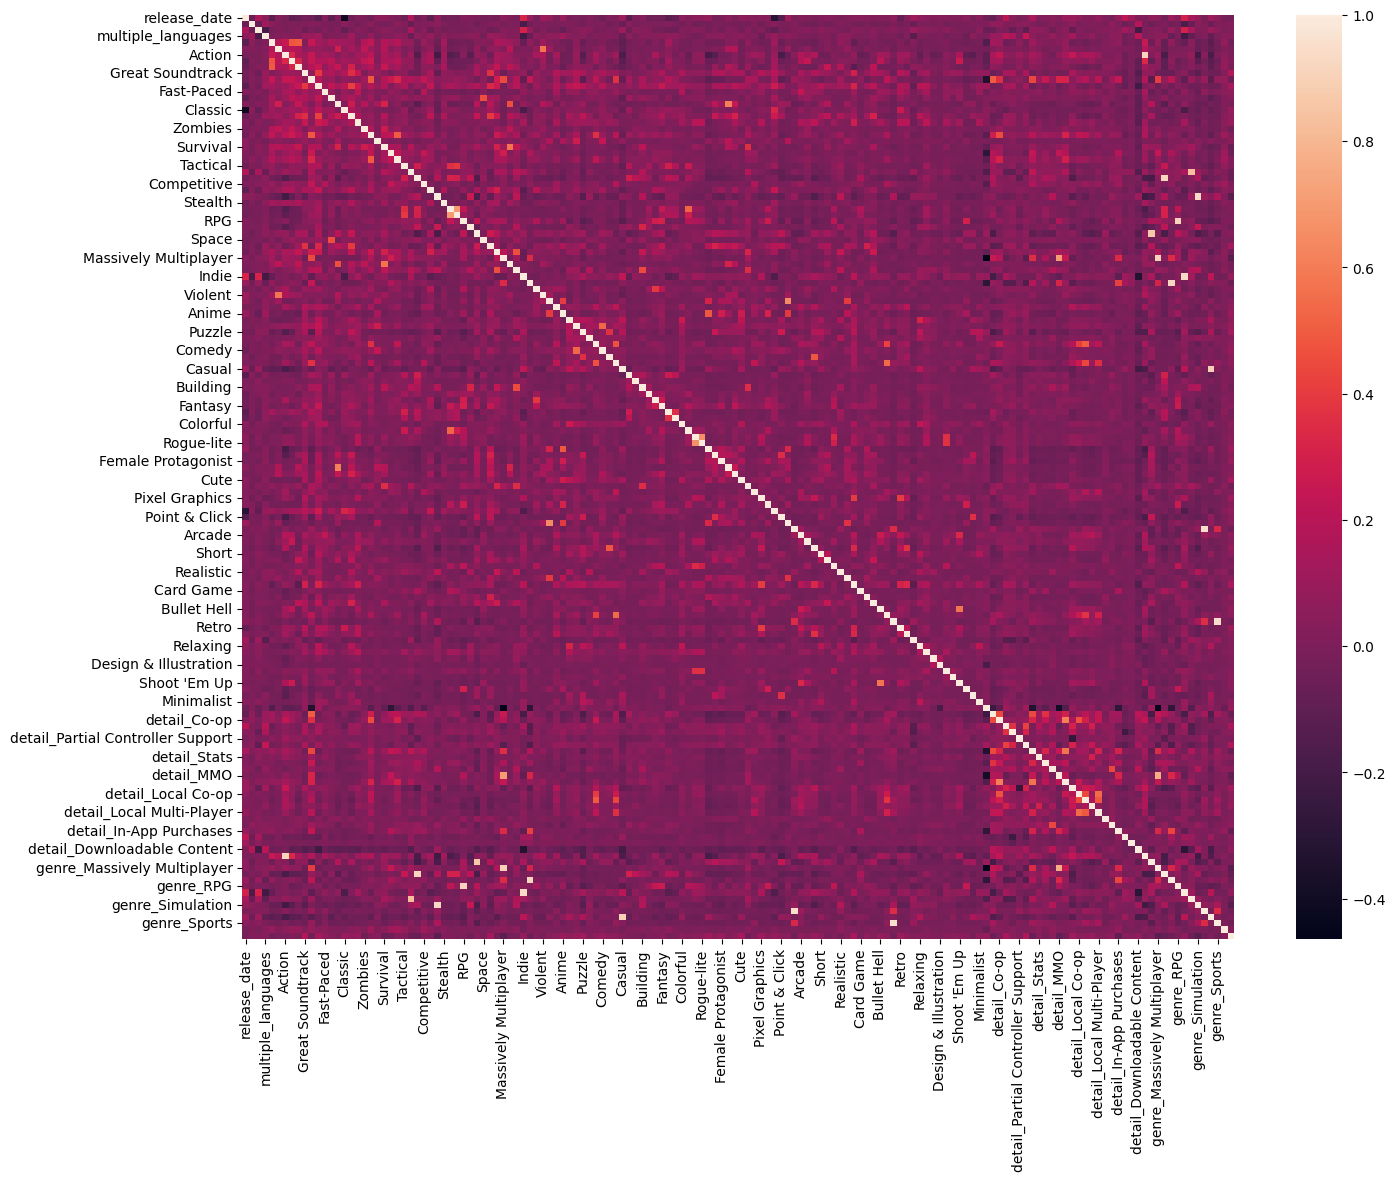

In [10]:
plt.figure(figsize=(16, 12))
sb.heatmap(dataframe.corr(),annot=False)
plt.show()

**Define the correlated and uncorrelated datasets.**

In [11]:
dataframe_correlated = dataframe.drop(["Puzzle-Platformer", "Rogue-lite", "Point & Click", "detail_Steam Workshop",
                                       "detail_Local Co-op", "detail_Steam Trading Cards", "Music", "Fantasy",
                                       "Rogue-like", "Sexual Content", "Dark", "Memes", "Sci-fi", "multiple_languages",
                                       "Relaxing", "Procedural Generation", "JRPG", "Replay Value", "Top-Down",
                                       "detail_Stats", "Nudity", "Adventure", "Mature", "RPGMaker",
                                       "detail_Captions available", "Psychological Horror", "has_setting",
                                       "detail_Local Multi-Player", "Casual", "total_reviews", "Education",
                                       "Physics", "Hack and Slash", "Turn-Based Combat", "Co-op", "Exploration",
                                       "Dungeon Crawler", "Third Person", "published_by_developer", "VR", "Fighting",
                                       "Turn-Based", "Online Co-Op", "Isometric", "Shooter", "Tactical", "Competitive",
                                       "genre_Casual", "Action RPG", "genre_Adventure",
                                       "detail_Partial Controller Support", "Stealth", "Design & Illustration", "RPG",
                                       "detail_Co-op", "Historical", "genre_RPG", "First-Person", "Turn-Based Strategy",
                                       "RTS", "Space", "Action", "Gore", "Tower Defense", "Horror", "Card Game",
                                       "Walking Simulator", "Hidden Object", "genre_Action",
                                       "detail_Cross-Platform Multiplayer", "Sandbox", "War", "Building", "Violent",
                                       "Realistic", "Survival Horror", "release_date", "Multiplayer", "FPS", "Sports",
                                       "Racing", "Zombies", "genre_Sports", "Crafting", "genre_Racing",
                                       "detail_Online Co-op", "Open World", "Management", "Free to Play"], axis=1)

In [12]:
dataframe_correlated

,Great Soundtrack,Singleplayer,Fast-Paced,Classic,Atmospheric,Difficult,Survival,PvP,Early Access,Strategy,...,detail_Profile Features Limited \r\n\t\t\t\t\t\t\t\t\t,detail_Steam is learning about this game \r\n\t\t\t\t\t\t\t\t\t,detail_Downloadable Content,genre_Massively Multiplayer,genre_Strategy,genre_Free to Play,genre_Indie,genre_Early Access,genre_Simulation,positive_reviews_share
0,True,True,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0.92
1,False,False,False,False,False,True,True,True,True,True,...,False,False,False,True,False,False,False,False,False,0.49
2,True,True,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,0.71
3,False,False,False,False,True,False,True,True,True,False,...,False,False,False,True,False,False,False,False,False,0.61
4,False,False,False,False,True,True,False,True,False,True,...,False,False,False,True,True,True,False,False,False,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1.00
16340,True,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,True,0.78
16341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0.90
16342,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,0.70


In [13]:
dataframe_uncorrelated = dataframe.drop(["Great Soundtrack", "detail_Steam Cloud", "detail_Steam Achievements", "2D",
                                        "Singleplayer", "Cute", "Story Rich", "detail_Full controller support",
                                        "Puzzle", "Pixel Graphics", "Visual Novel", "Retro", "Anime", "Classic",
                                        "Difficult", "Funny", "detail_Steam Leaderboards", "Platformer", "Comedy",
                                        "Female Protagonist", "detail_Single-player", "Indie", "Masterpiece",
                                        "Bullet Hell", "genre_Indie", "Atmospheric", "Local Co-Op", "Arcade",
                                        "detail_Includes level editor", "detail_Downloadable Content",
                                        "Local Multiplayer", "Minimalist", "detail_Shared/Split Screen",
                                        "Choices Matter", "Family Friendly", "Fast-Paced", "Controller",
                                        "Side Scroller", "Shoot 'Em Up", "Short", "4 Player Local", "Colorful",
                                        "Mystery", "PvP", "genre_Free to Play", "detail_Multi-player",
                                        "Early Access", "genre_Early Access", "Strategy", "Survival",
                                        "detail_Online Multi-Player", "genre_Strategy", "detail_MMO",
                                        "detail_In-App Purchases", "genre_Massively Multiplayer",
                                        "Massively Multiplayer", "Simulation", "genre_Simulation"], axis=1)

In [14]:
dataframe_uncorrelated

,release_date,has_setting,published_by_developer,multiple_languages,FPS,Gore,Action,Shooter,First-Person,Multiplayer,...,detail_Profile Features Limited \r\n\t\t\t\t\t\t\t\t\t,detail_Steam is learning about this game \r\n\t\t\t\t\t\t\t\t\t,genre_Action,genre_Adventure,genre_RPG,genre_Racing,genre_Casual,genre_Sports,total_reviews,positive_reviews_share
0,2016,False,False,True,True,True,True,True,True,True,...,False,False,True,False,False,False,False,False,42550.0,0.92
1,2017,False,True,True,True,False,True,True,True,True,...,False,False,True,True,False,False,False,False,836608.0,0.49
2,2018,False,False,True,False,False,True,False,False,True,...,False,False,True,True,False,False,False,False,7030.0,0.71
3,2018,False,True,True,True,False,True,True,False,True,...,False,False,True,True,False,False,False,False,167115.0,0.61
4,2003,False,True,True,False,False,True,False,False,True,...,False,False,True,False,True,False,False,False,11481.0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16339,2018,False,True,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,17.0,1.00
16340,2018,False,True,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,14.0,0.78
16341,2017,False,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,11.0,0.90
16342,2019,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,10.0,0.70


**saving the correlated and uncorrelated datasets.**

In [15]:
dataframe_correlated.to_csv("Datasets/steam_games_correlated.csv", index=False)

In [16]:
dataframe_uncorrelated.to_csv("Datasets/steam_games_uncorrelated.csv", index=False)

**The dataset consist mainly from boolean type of data. The darget is continuous (float). No strong correlation between the features. Regarding all of this, best model to make a prediction would be RandomForestRegressor and XGBoostRegressor. I could also turn the boolean to int and target to int and deduct a classification.**